**Import das bibliotecas utilizadas ao longo da lista**

In [21]:
import math
import numpy as np
from numpy import loadtxt
import matplotlib.pyplot as plt

# **Problema 1 - Diferenças centradas e derivada**

In [4]:
def f(xi):
  return 1+(1/2)*math.tanh(2*xi)

x = np.linspace(-2, 2, 100)
h = 1e-5

O valor de h = 1e-5 foi escolhido para otimização das contas, seguindo o recomendado pelo Newmann pg192. Adicionamos então uma lista dfdx para armazenar os 100 valores da derivada da função no intervalo de -2 a 2:

In [5]:
dfdx = []
for value in x:
  dfdx.append((f(value+h/2)-f(value-h/2))/h)

Sabendo que a derivada da tanh(2x) é 2(1-tanh(x)^2), temos a forma analítica para derivada: 1-((e^4x-1)/(e^4x+1))^2. Calculamos então as mesmas 100 derivadas no mesmo intervalo de -2 a 2 mas agora usando essa forma analítica:

In [6]:
def f_anal(xi):
  num = np.exp(4*xi)-1
  den = np.exp(4*xi)+1
  return 1-(num/den)**2

dfdx_anal = []
for value in x:
  dfdx_anal.append(f_anal(value))

Plotando o gráfico **por essas derivadas da função** (linha azul) e **pela forma analítica** (pontos vermelhos):

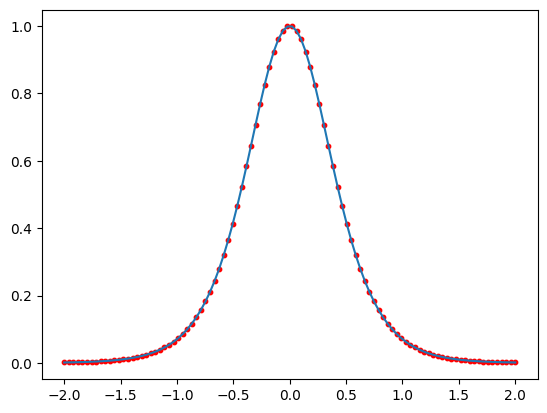

In [7]:
plt.plot(x, dfdx)
plt.scatter(x, dfdx_anal, s=10, color='red')
plt.show()

# **Problema 2 - Derivadas e ordens de aproximação**

**a)** Primeiro criamos dois arrays para armazenas os coeficientes da **Tabela 5.1**. Os **'coeffs_dg3'** que multiplicam as funções por fora e os **'coeffs_hs'** que são os coeficientes dos argumentos dessas mesmas respectivas funções.

Criamos a função **func_dg3** que recebe como argumento o array x (-2, 2) e **um valor único de h** e retorna uma **lista** com os valores das **derivadas no intervalo de x, usando o h do argumento.**

In [8]:
def f2(xi):
  return 1+(1/2)*math.tanh(2*xi)

def func_dg3(x2, h):

  coeffs_dg3 = np.array([1/24, -27/24, 27/24, -1/24])
  coeffs_hs = np.array([-3/2, -1/2, 1/2, 3/2])

  dfdx2_all = []

  for value in x2:

    dfdx2_value = 0

    for coef_dg3, coef_h in zip(coeffs_dg3, coeffs_hs):
      func = (coef_dg3 * f2(value + h * coef_h))/h
      dfdx2_value += func

    # for i in range(4):
    #   func = (coeffs_dg3[i]*f2(value + coeffs_hs[i]*h))/h
    #   dfdx2_value += func

    dfdx2_all.append(dfdx2_value)

  return dfdx2_all

In [9]:
x2 = np.linspace(-2, 2, 100)
h = 1e-5

lst = func_dg3(x2, h)

print(lst[:5])

[0.0013409506746029365, 0.0015759800767227716, 0.0018521650158618286, 0.002176697651975701, 0.0025580213437024213]


Plotando essas derivadas da função **pela aproximação de ordem 3** (linha azul) e **pela forma analítica** de anteriormente (pontos vermelhos):

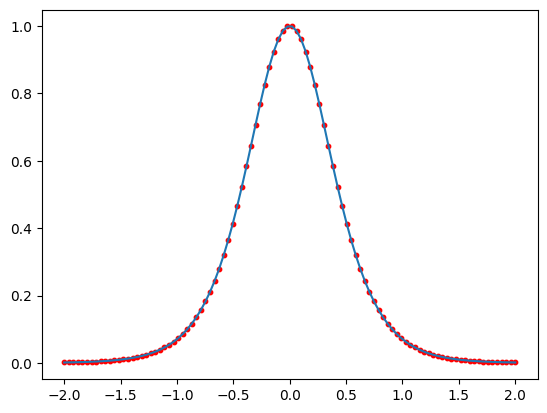

In [10]:
plt.scatter(x, dfdx_anal, s=10, color='red')
plt.plot(x2, lst)
plt.show()

**b)** para x = 0, a tangente hiperbólica zera, logo **f(x) = 1 + (1/2)*tanh(2x)**, então **f(0) = 1**.

Criamos então três funções, uma é a que vai **verificar o h que da o menor erro**, outra que **calcula a derivada** e outra que **calcula a propria funcao**. estamos utilizando **np.argmin(array)** para pegar o índice do menor valor dentro do array. Como os **for** trabalham de índice em índice de forma crescente, sabemos que o índice retornado por **np.argmin(array)** será o mesmo índice do array de h's.

In [11]:
def fb(xi):
  return 1+(1/2)*math.tanh(2*xi)

def derivada(h):
  return (fb(0+h/2)-fb(0-h/2))/h

def funcao_verif_h(hs):

  # qual h da o menor 1 - dfdxb

  erros = []
  for h in hs:
    erros.append(abs(1-derivada(h)))

  # usando np.argmin(array) para pegar o índice do menor valor

  indice = np.argmin(erros)
  return indice

In [12]:
hs = np.array([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7])

indice = funcao_verif_h(hs)

print(indice)

4


Para mostrar a **validade do processo** vamos trocar a sequencia dos argumentos do array **hs** e printar as posições do h que minimiza o erro.

 Como podemos perceber sempre encontramos o **índice respectivo ao h = 1e-6:**

In [13]:
hs2 = np.array([1e-6, 1e-4, 1e-3, 1e-5, 1e-2, 1e-7])
hs3 = np.array([1e-7, 1e-3, 1e-6, 1e-5, 1e-4, 1e-2])

indice2 = funcao_verif_h(hs2)
indice3 = funcao_verif_h(hs3)

print(f'indice2: {indice2} e indice3: {indice3}')

indice2: 0 e indice3: 2


**c)** Como sabemos, a função **func_dg3()** usada anteriormente calcula a derivada usando uma aproximação de ordem 3, logo utilizaremos a mesma para calcular a derivada da **função para cada h em hs**. Assim utilizando **funcao_verif_h** que criamos, veremos o indice (e valor) do h que minimiza o erro:


In [14]:
def fb(xi):
  return 1+(1/2)*math.tanh(2*xi)

def funcao_verif_hdg3(hs):

  # qual h da o menor 1 - dfdxb
  x3 = np.array([0])

  erros = []
  for h in hs:
    temp = func_dg3(x3, h)

    erros.append(abs(1-temp[0]))

  # usando np.argmin(array) para pegar o índice do menor valor

  indice = np.argmin(erros)
  return indice

In [15]:
hs_dg3 = np.array([1e-2, 1e-6, 1e-4, 1e-5, 1e-3, 1e-7])

indice_dg3 = funcao_verif_hdg3(hs_dg3)

print(f'h que minimiza: {hs_dg3[indice_dg3]}')

h que minimiza: 0.0001


Como vemos a minimização do erro neste caso ocorre para **h = 1e-4**, ou seja, um h maior do que o anterior.

A explicação para isso é que quando olhamos para **Tabela 5.1**, vemos que ao comparar os graus pares e ímpares, eles têm o erro proporcional à mesma ordem de h, **porém os graus pares têm coeficientes menores multiplicando as funções**. Além disso os graus ímpares **possuem amostras em pontos intermediários** enquanto os graus pares anteriores não.

# **Problema 3 - Derivadas e gráficos**

# **Problema 4 - Campo elétrico de uma distribuicao de cargas**

**a)** Para cada posição da matriz, foi medida a distância separadamente para as duas cargas e **calculados os dois potenciais para cada ponto**. Podemos fazer isso por consequência do **princípio da superposição** onde uma carga não influencia a atuação da outra.

In [166]:
q1, q2 = 1, -1
k = 9e9

n = 1000

def func(q, r):
  return q*k/r

x = np.linspace(-0.5, 0.5, n)
y = np.linspace(-0.5, 0.5, n)

phi = np.empty((n, n))

r1 = np.array([0.05, 0])
r2 = np.array([-0.05, 0])

for i in range(n):
  for j in range(n):

    rij1 = np.sqrt((x[j]-r1[0])**2 + (y[i]-r1[1])**2)
    rij2 = np.sqrt((x[j]-r2[0])**2 + (y[i]-r2[1])**2)

    phi[i][j] = func(q1, rij1) + func(q2, rij2)

# E = -grad(phi)

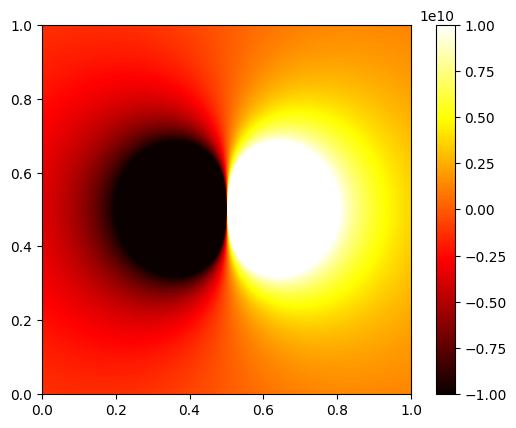

In [167]:
plt.imshow(phi, origin='lower',extent = [0,1,0,1], vmax=1e10, vmin = -1e10)
plt.colorbar()
plt.hot()

Para realizar o calculo de E em cada ponto, dividimos a **superfície phi(x, y)** em uma grade com 1000 intervalos. A componente Ex (ou Ey) em cada intervalo **é a inclinação da reta tangente a phi** naquele ponto xi, yi, **pois Ex é a derivada de phi**.

Calculo de Ex: **para cada yi fixo**, calculamos a inclinação da reta tangente à superfície phi por (phi[i] - phi[i-1]) / (x[i] - x[i-1]) **para cada valor de xi nesse yi fixo**, assim temos uma linha do Ex. **Para calcular toda região basta fazer o mesmo processo para o yi seguinte**.

Calculo de Ey: **para cada xi fixo**, calculamos a inclinação da reta tangente à superfície phi por (phi[j] - phi[j-1]) / (y[j] - y[j-1]) **para cada valor de yi nesse xi fixo**, assim temos uma linha do Ex. **Para calcular toda região basta fazer o mesmo processo para o xi seguinte**.

In [208]:
# def gradiente(arr):

der_y_ij = np.empty((1000, 1000))
der_x_ij = np.empty((1000, 1000))

x2 = np.linspace(-0.5, 0.5, 1000)
y2 = np.linspace(-0.5, 0.5, 1000)


# calculo das componentes y do campo elétrico

for i in range(1000):
  for j in range(1000):

    if j == 0 or i == 0:
      der_y_ij[i][j] = -(phi[i][j])/(y2[j])
    else:
      der_y_ij[i][j] = -(phi[i][j] - phi[i-1][j-1])/(y2[j]-y2[j-1])

# calculo das componentes x do campo elétrico

for j in range(1000):
  for i in range(1000):

    if j == 0 or i == 0:
      der_x_ij[j][i] = -(phi[i][j])/(x2[j])
    else:
      der_x_ij[j][i] = -(phi[i][j] - phi[i-1][j-1])/(x2[j]-x2[j-1])

Text(0, 0.5, 'y')

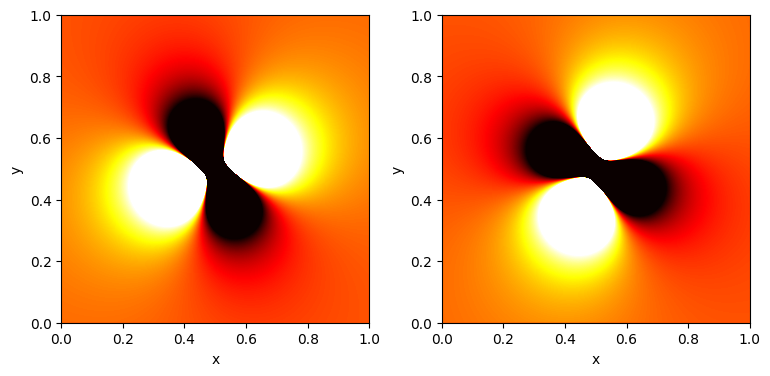

In [209]:
fig, axs = plt.subplots(1, 2, figsize= ((9, 4)))

axs[0].imshow(der_y_ij, origin='lower',extent = [0,1,0,1], vmax=1e11, vmin = -1e11)
# axs[0].set_title('Campo elétrico Ey em cada ponto')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

axs[1].imshow(der_x_ij, origin='lower',extent = [0,1,0,1], vmax=1e11, vmin = -1e11)

# axs[1].title('Campo elétrico Ey em cada ponto')
axs[1].set_xlabel('x')
axs[1].set_ylabel('y')

# plt.colorbar()
# plt.hot()

# plt.colorbar()
# plt.hot()